In [1]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import numpy as np

from model_testing import *

In [2]:
labels = ['neutral', 'angry', 'joy', 'sadness', 'fear'] # Models classes 

In [3]:
# Parse the json files used for the test and extract the dataframe corrisponding to the msgs and audio 
df_text = test_text() 
df_audio = test_audio()

In [4]:
df_text.Model_Label.loc[df_text.Model_Label == 'anger'] = 'angry'

df_audio.Model_Label.loc[df_audio.Model_Label == 'sad'] = 'sadness'

In [5]:
df_text.head()

,Message,User_Label,Model_Label
0,i'm here,neutral,neutral
1,i love this app,joy,joy
2,today it is a good day,joy,neutral
3,yess it's beautiful,joy,joy
4,yes because it's my birthday,joy,neutral


<AxesSubplot:>

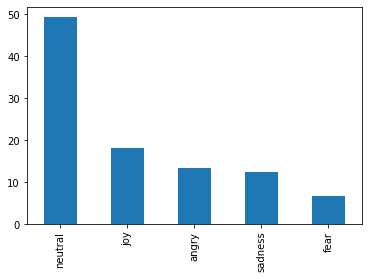

In [6]:
round(df_text.User_Label.value_counts(normalize=True)*100,2).plot(kind='bar')

In [7]:
df_audio.head(100)

,Audio_Name,User_Label,Model_Label
0,audio1653576430.wav,joy,neutral
1,audio1653584152.wav,angry,neutral
2,audio1653584184.wav,angry,neutral
3,audio1653577869.wav,joy,neutral
4,audio1653577894.wav,sadness,neutral
...,...,...,...
93,audio1653415771.wav,sadness,fear
94,audio1653415784.wav,joy,neutral
95,audio1653415810.wav,neutral,fear
96,audio1653415822.wav,fear,fear


<AxesSubplot:>

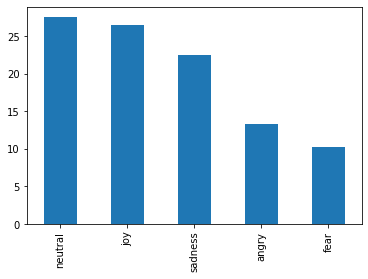

In [8]:
round(df_audio.User_Label.value_counts(normalize=True)*100,2).plot(kind='bar')

---

## BALANCING

In [9]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

### Balancing TEXT dataset

In [10]:
X_res_text, y_res_text = rus.fit_resample(df_text, df_text['User_Label'])

<AxesSubplot:>

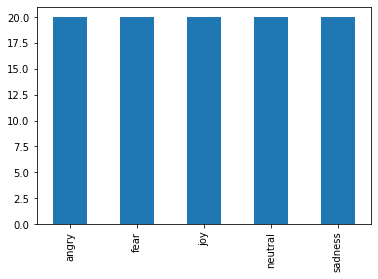

In [11]:
round(X_res_text.User_Label.value_counts(normalize=True)*100,2).plot(kind='bar')

### Balancing AUDIO dataset

In [12]:
if len((df_audio.User_Label.value_counts())) != 1:
    X_res_audio, y_res_audio = rus.fit_resample(df_audio, df_audio['User_Label'])
else:
    X_res_audio = df_audio

<AxesSubplot:>

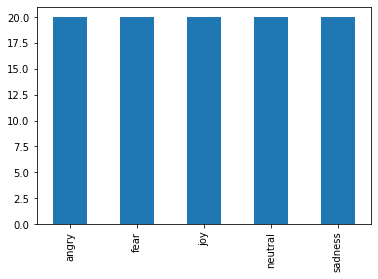

In [13]:
round(X_res_audio.User_Label.value_counts(normalize=True)*100,2).plot(kind='bar')

--- 

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [19]:
def compute_metrics(y_true, predictions):
  average = "macro"
  acc = accuracy_score(y_true, predictions)
  precision = precision_score(y_true, predictions, average=average)
  recall = recall_score(y_true, predictions, average=average)
  f1 = f1_score(y_true, predictions, average=average)
  print(f"Model has acc = {acc}\n, precision = {precision}\n, recall = {recall}\n, f1_score = {f1}\n")

## Text metrics ##

Compute the model accuracy score and display the confusion matrix on TEXT results. 

In [20]:
y_user_text = X_res_text.User_Label
y_model_text = X_res_text.Model_Label

Model accuracy on user labels: 0.38

------------ CONFUSION MATRIX ------------


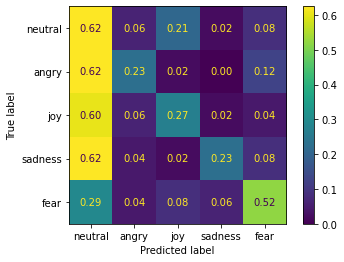

In [21]:
# Compute the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_user_text, y_model_text, labels = labels, normalize='true', values_format='.2f')

# Compute and print the accuracy score of the model
print('Model accuracy on user labels: {:.2f}\n'.format(accuracy_score(y_user_text, y_model_text)))

print("------------ CONFUSION MATRIX ------------")

In [22]:
compute_metrics(y_user_text, y_model_text)

Model has acc = 0.375
, precision = 0.49898107864278024
, recall = 0.375
, f1_score = 0.37870847657773077



## Audio metrics ##

Compute the model accuracy score and display the confusion matrix on AUDIO results. 

In [23]:
y_user_audio = X_res_audio.User_Label
y_model_audio = X_res_audio.Model_Label

Model accuracy on user labels: 0.32

------------ CONFUSION MATRIX ------------


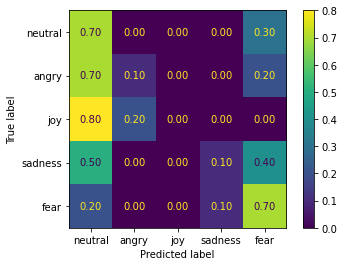

In [24]:
# Compute the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_user_audio, y_model_audio, labels = labels, normalize='true', values_format='.2f')

# Compute and print the accuracy score of the model
print('Model accuracy on user labels: {:.2f}\n'.format(accuracy_score(y_user_audio, y_model_audio)))

print("------------ CONFUSION MATRIX ------------")

In [25]:
compute_metrics(y_user_audio, y_model_audio)

Model has acc = 0.32
, precision = 0.30244252873563215
, recall = 0.32
, f1_score = 0.2435897435897436



/opt/anaconda3/envs/MobileProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
